### Keras - MNIST MLP

In [14]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt

def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

    Modify layers size and epochs
    Which accuracy can you obtain?

In [15]:
batch_size = 128
epochs = 10
hlayer1 = 8
hlayer2 = 8

    Prepare Data

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [17]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

####    Definition of a Simple [784:8:8:10] Network

In [18]:
model = Sequential()
model.add(Dense(hlayer1, activation='relu', input_shape=(784,)))
model.add(Dense(hlayer2, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


    Method Fit Trains Network !

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 132us/step - loss: 1.0366 - acc: 0.6799 - val_loss: 0.5152 - val_acc: 0.8539
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.4609 - acc: 0.8729 - val_loss: 0.3866 - val_acc: 0.8890
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3853 - acc: 0.8927 - val_loss: 0.3564 - val_acc: 0.8970
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.3501 - acc: 0.9025 - val_loss: 0.3317 - val_acc: 0.9044
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3240 - acc: 0.9099 - val_loss: 0.3092 - val_acc: 0.9132
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.3051 - acc: 0.9143 - val_loss: 0.2965 - val_acc: 0.9149
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2923 - acc: 0.9170 - val_loss: 0.2887 - 

Test loss: 0.27497889505922796
Test accuracy: 0.9214
Train accuracy: 0.9257333333333333


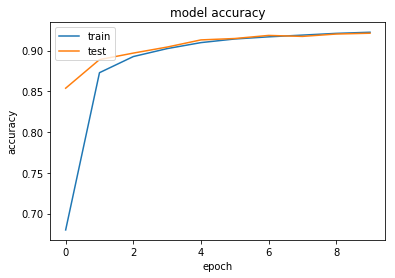

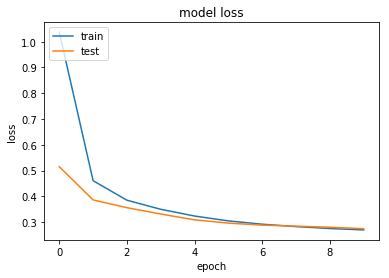

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)